# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup object
response = requests.get(url)

# Retrieve the HTML content from the response
html_content = response.text

# Create a BeautifulSoup object
mars_weather_scrape = BeautifulSoup(html_content, 'html.parser')

table = mars_weather_scrape.find('table', class_= 'table')

weather_data = []

In [5]:
# Extract all rows of data
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    if len(cells) == 7:
        row_data = {
            'id': cells[0].text.strip(),  # Update key1, key2, etc. as needed
            'terrestrial_date': cells[1].text.strip(),
            'sol': cells[2].text.strip(),
            'ls': cells[3].text.strip(),
            'month': cells[4].text.strip(),
            'min_temp': cells[5].text.strip(),
            'pressure': cells[6].text.strip()
        }
        weather_data.append(row_data)

print(weather_data)

[{'id': 'id', 'terrestrial_date': 'terrestrial_date', 'sol': 'sol', 'ls': 'ls', 'month': 'month', 'min_temp': 'min_temp', 'pressure': 'pressure'}, {'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Convert the list of dictionaries to a Pandas DataFrame
mars_weather_df = pd.DataFrame(weather_data)

# Drop the first row from the DataFrame permanently
mars_weather_df = mars_weather_df.iloc[1:].reset_index(drop=True)

# Print the DataFrame
mars_weather_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [8]:
# Change data types for data analysis

mars_weather_df = mars_weather_df.astype({
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int64',
    'ls': 'int64',
    'month': 'int64',
    'min_temp': 'float64',
    'pressure': 'float64'
})

print(mars_weather_df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [9]:
mars_months = mars_weather_df['month'].max()

print("There are", mars_months, "months on Mars.")

# THIS IS A QUESTION THAT DOESN'T HAVE AN EXACT ANSWER. EARTH MONTHS ARE DETERMINED AS A 
# CONVENTION OF THE LUNAR CYCLE WHEREAS OUR YEAR IS FIXED TO A SOLAR CYCLE. MARS DOES NOT
# HAVE A LARGE MOON, SO OUR DEFINITION OF MONTHS DOESN'T APPLY AND  A MONTH CALENDAR BREAK WILL 
# LIKELY BE ARBITRARY. NO ONE HAS DECIDED HOW MANY MONTHS THERE ARE ON MARS. 

# HOWEVER, THE TABLE LISTS A MAXIMUM OF 12 IN THE COLUMN "MONTHS", IMPLYING THAT THEY THINK
# IT IS 12. THEREFORE, I PULLED THAT NUMBER.

There are 12 months on Mars.


In [10]:
mars_days = mars_weather_df['sol'].nunique()

print("Martian days (Sols) of data:", mars_days)

Martian days (Sols) of data: 1867


In [11]:
monthly_avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

print(monthly_avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


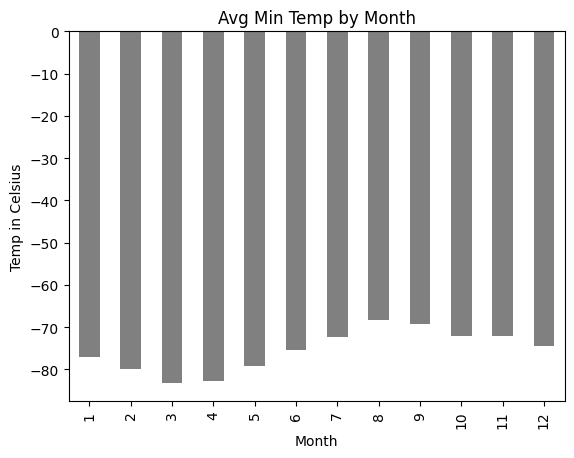

In [12]:
monthly_avg_min_temp.plot(kind='bar', color='gray')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Temp in Celsius')
plt.title('Avg Min Temp by Month')

# Show the plot
plt.show()

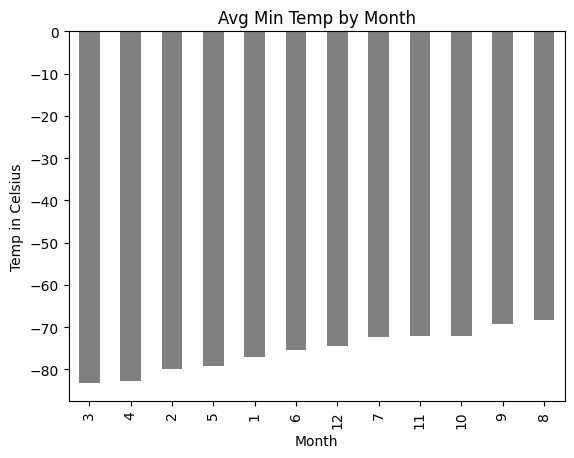

In [13]:
average_min_temp_by_month_sorted = monthly_avg_min_temp.sort_values()

# Plot the sorted data on a bar chart with a soft gray color
average_min_temp_by_month_sorted.plot(kind='bar', color='gray')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Temp in Celsius')
plt.title('Avg Min Temp by Month')

# Show the plot
plt.show()

In [14]:
monthly_avg_pres = mars_weather_df.groupby('month')['pressure'].mean()

print(monthly_avg_pres)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


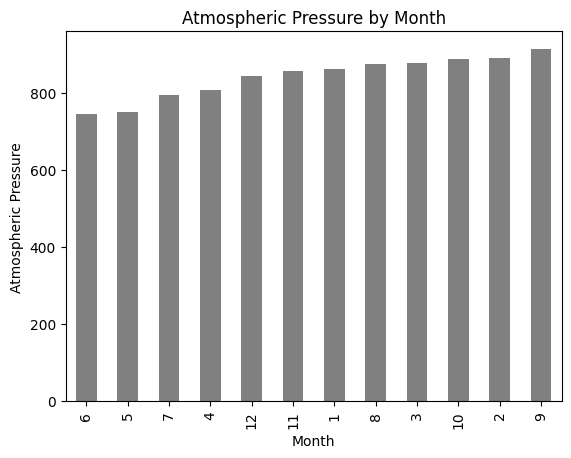

In [15]:
monthly_avg_pres_ascending= monthly_avg_pres.sort_values()

monthly_avg_pres_ascending.plot(kind='bar', color='gray')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Atmospheric Pressure by Month')

# Show the plot
plt.show()

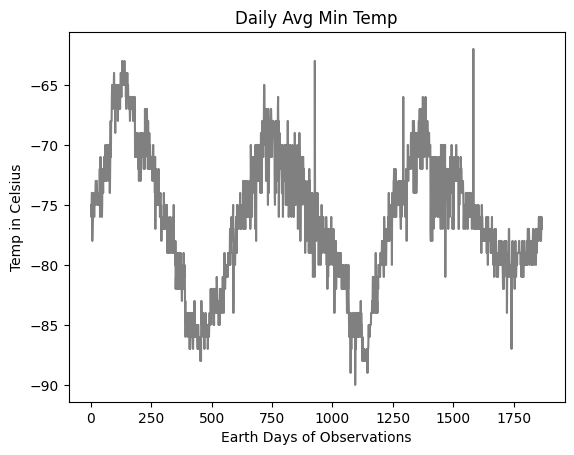

In [16]:
daily_avg_min_temp = mars_weather_df.groupby('terrestrial_date')['min_temp'].mean()

earth_date_recordings = len(mars_weather_df['terrestrial_date'].unique())

plt.plot(range(1, earth_date_recordings + 1), daily_avg_min_temp, color='gray')

plt.xlabel('Earth Days of Observations')
plt.ylabel('Temp in Celsius')
plt.title('Daily Avg Min Temp')

plt.show()

Average minimum temp is lowest in the third Martian month. The average minimum temp is highest in the eighth month.

Atmospheric pressure is lowest in the sixth Martian month and highest in the ninth Martian month.

Chart indicates a Martian year of approximately 650-700 days if measuring from peak to peak of daily minimum temperatures. This is in line with a year of roughly 687 earth days (some sources say slightly more, there are fractional days in a year necessitating a theoretical leap year just as on earth).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [17]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=True)

In [18]:
browser.quit()